# 2.1 Data Preprocessing & Cleaning 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datasist.structdata import detect_outliers


In [2]:
df = pd.read_csv("../datasets/processed.cleveland.data", encoding="ISO-8859-1", header=None, na_values=["?", -9])
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
column_names = [
    "Age",                    
    "Gender",                 
    "Chest Pain Type",        
    "Resting Blood Pressure", 
    "Cholesterol Level",      
    "Fasting Blood Sugar",    
    "Resting ECG",            
    "Maximum Heart Rate Achieved", 
    "Exercise Induced Angina",     
    "ST Depression",          
    "Slope",    
    "Number of Major Arteries", 
    "Thalassemia",            
    "Heart Disease Status"]

df.columns = column_names
df.columns = df.columns.str.strip()
df.head(10)

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          303 non-null    float64
 1   Gender                       303 non-null    float64
 2   Chest Pain Type              303 non-null    float64
 3   Resting Blood Pressure       303 non-null    float64
 4   Cholesterol Level            303 non-null    float64
 5   Fasting Blood Sugar          303 non-null    float64
 6   Resting ECG                  303 non-null    float64
 7   Maximum Heart Rate Achieved  303 non-null    float64
 8   Exercise Induced Angina      303 non-null    float64
 9   ST Depression                303 non-null    float64
 10  Slope                        303 non-null    float64
 11  Number of Major Arteries     299 non-null    float64
 12  Thalassemia                  301 non-null    float64
 13  Heart Disease Status

| Column                          | Description                                               |
|-------------------------------- |-----------------------------------------------------------|
| Age                             | Age of the patient (in years)  
| Gender                          | Gender of the patient (Male/Female)  
| Chest Pain Type                 | Type of chest pain experienced  
| Resting Blood Pressure          | Resting blood pressure (mm Hg)  
| Cholesterol Level               | Cholesterol level (mg/dl)  
| Fasting Blood Sugar             | Fasting blood sugar level (mg/dl)  
| Resting ECG                     | Results of resting electrocardiogram  
| Maximum Heart Rate Achieved     | Maximum heart rate achieved during exercise  
| Exercise Induced Angina         | Angina induced by exercise (1=Yes, 0=No)  
| ST Depression                   | ST depression induced by exercise relative to rest  
| Slope of ST Segment             | Slope of the peak exercise ST segment  
| Number of Major Vessels         | Number of major vessels colored by fluoroscopy  
| Thalassemia                     | Thalassemia status (categorical)  
| Heart Disease Status            | Presence of heart disease (1=Yes, 0=No)  

---

* **Age**: العمر (بالسنوات)
* **Gender**: الجنس (عادةً 1 = ذكر، 0 = أنثى)
* **Chest Pain Type**: نوع ألم الصدر

  * 1: ألم صدري نمطي (typical angina)
  * 2: ألم صدري غير نمطي (atypical angina)
  * 3: ألم صدري غير مرتبط بالقلب (non-anginal pain)
  * 4: لا يوجد ألم صدري (asymptomatic)
* **Resting Blood Pressure**: ضغط الدم الانقباضي عند الراحة (Resting blood pressure, mm Hg)
* **Cholesterol Level**: مستوى الكوليسترول في الدم (Serum cholesterol, mg/dl)
* **Fasting Blood Sugar**: مستوى السكر في الدم صائم (Fasting blood sugar > 120 mg/dl)

  * 1: نعم (سكر عالي)
  * 0: لا
* **Resting ECG**: نتائج تخطيط القلب عند الراحة (Resting electrocardiographic results)

  * 0: طبيعي
  * 1: وجود بعض مشاكل كهربائية
  * 2: وجود تشوهات محتملة في عضلة القلب
* **Maximum Heart Rate Achieved**: أعلى معدل ضربات قلب وصل له المريض أثناء التمرين 
* **Exercise Induced Angina**: هل يعاني من إغماء بسبب التمرين 

  * 1: نعم
  * 0: لا
* **ST Depression**: انخفاض ST بعد التمرين مقارنة بالراحة (ST depression induced by exercise relative to rest)
* **Slope**: ميل قطع ST أثناء التمرين (Slope of the peak exercise ST segment)

  * 1: صاعد (upsloping)
  * 2: مستوٍ (flat)
  * 3: نازل (downsloping)
* **Number of major arteries**: عدد الشرايين الكبرى التي تظهر فيها تضييقات (عدد الشرايين التاجية المصابة) (0-3)
* **Thalassemia**: نوع الثلاسيميا أو مشكلة في الدم 

  * 3: طبيعي
  * 6: وجود مشكلة مؤقتة
  * 7: وجود مشكلة دائمة
* **Heart Disease Status**: نتيجة الفحص النهائي (وجود مرض القلب)

  * 1: وجود مرض القلب
  * 0: لا يوجد مرض



---
## Removing Duplicate Rows from the Dataset
---

In [5]:
print("Shape of Dataset Before Removeing Duplicate", df.shape)

df.drop_duplicates(inplace=True)

print("Shape of Dataset After Removeing Duplicate", df.shape)

Shape of Dataset Before Removeing Duplicate (303, 14)
Shape of Dataset After Removeing Duplicate (303, 14)


---
## Checking for Missing Values in the Dataset
---

In [6]:
# Summary
df.isnull().sum()

Age                            0
Gender                         0
Chest Pain Type                0
Resting Blood Pressure         0
Cholesterol Level              0
Fasting Blood Sugar            0
Resting ECG                    0
Maximum Heart Rate Achieved    0
Exercise Induced Angina        0
ST Depression                  0
Slope                          0
Number of Major Arteries       4
Thalassemia                    2
Heart Disease Status           0
dtype: int64

In [7]:
df.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
# Identifying numerical and categorical columns
numeric_cols = [
    "Age", "Resting Blood Pressure", "Cholesterol Level", "Maximum Heart Rate Achieved", "ST Depression"]

categorical_cols = [
    "Gender", "Chest Pain Type", "Fasting Blood Sugar", "Resting ECG",
    "Exercise Induced Angina", "Slope", "Number of Major Arteries",
    "Thalassemia"]


---
## Exploring Unique Values in Categorical Columns
---

In [9]:
for cat_col in categorical_cols:
    print("Name: ", cat_col)
    print(df[cat_col].unique().tolist())
    print("-"*50)

Name:  Gender
[1.0, 0.0]
--------------------------------------------------
Name:  Chest Pain Type
[1.0, 4.0, 3.0, 2.0]
--------------------------------------------------
Name:  Fasting Blood Sugar
[1.0, 0.0]
--------------------------------------------------
Name:  Resting ECG
[2.0, 0.0, 1.0]
--------------------------------------------------
Name:  Exercise Induced Angina
[0.0, 1.0]
--------------------------------------------------
Name:  Slope
[3.0, 2.0, 1.0]
--------------------------------------------------
Name:  Number of Major Arteries
[0.0, 3.0, 2.0, 1.0, nan]
--------------------------------------------------
Name:  Thalassemia
[6.0, 3.0, 7.0, nan]
--------------------------------------------------


---
## Frequency Distribution of Categorical Features
---

In [10]:
for cat_col in categorical_cols:
    print(df[cat_col].value_counts())
    print("-"*50)

Gender
1.0    206
0.0     97
Name: count, dtype: int64
--------------------------------------------------
Chest Pain Type
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64
--------------------------------------------------
Fasting Blood Sugar
0.0    258
1.0     45
Name: count, dtype: int64
--------------------------------------------------
Resting ECG
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64
--------------------------------------------------
Exercise Induced Angina
0.0    204
1.0     99
Name: count, dtype: int64
--------------------------------------------------
Slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64
--------------------------------------------------
Number of Major Arteries
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
--------------------------------------------------
Thalassemia
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64
--------------------------------------------------


---
## Encoding Categorical Columns as Integers
---

In [11]:
Int_cols = ["Gender", "Chest Pain Type", "Fasting Blood Sugar", "Resting ECG", 
             "Exercise Induced Angina", "Slope", "Number of Major Arteries", "Thalassemia", "Heart Disease Status"]

for col in Int_cols:
    df[col] = df[col].astype("Int64")
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          303 non-null    float64
 1   Gender                       303 non-null    Int64  
 2   Chest Pain Type              303 non-null    Int64  
 3   Resting Blood Pressure       303 non-null    float64
 4   Cholesterol Level            303 non-null    float64
 5   Fasting Blood Sugar          303 non-null    Int64  
 6   Resting ECG                  303 non-null    Int64  
 7   Maximum Heart Rate Achieved  303 non-null    float64
 8   Exercise Induced Angina      303 non-null    Int64  
 9   ST Depression                303 non-null    float64
 10  Slope                        303 non-null    Int64  
 11  Number of Major Arteries     299 non-null    Int64  
 12  Thalassemia                  301 non-null    Int64  
 13  Heart Disease Status

<Axes: >

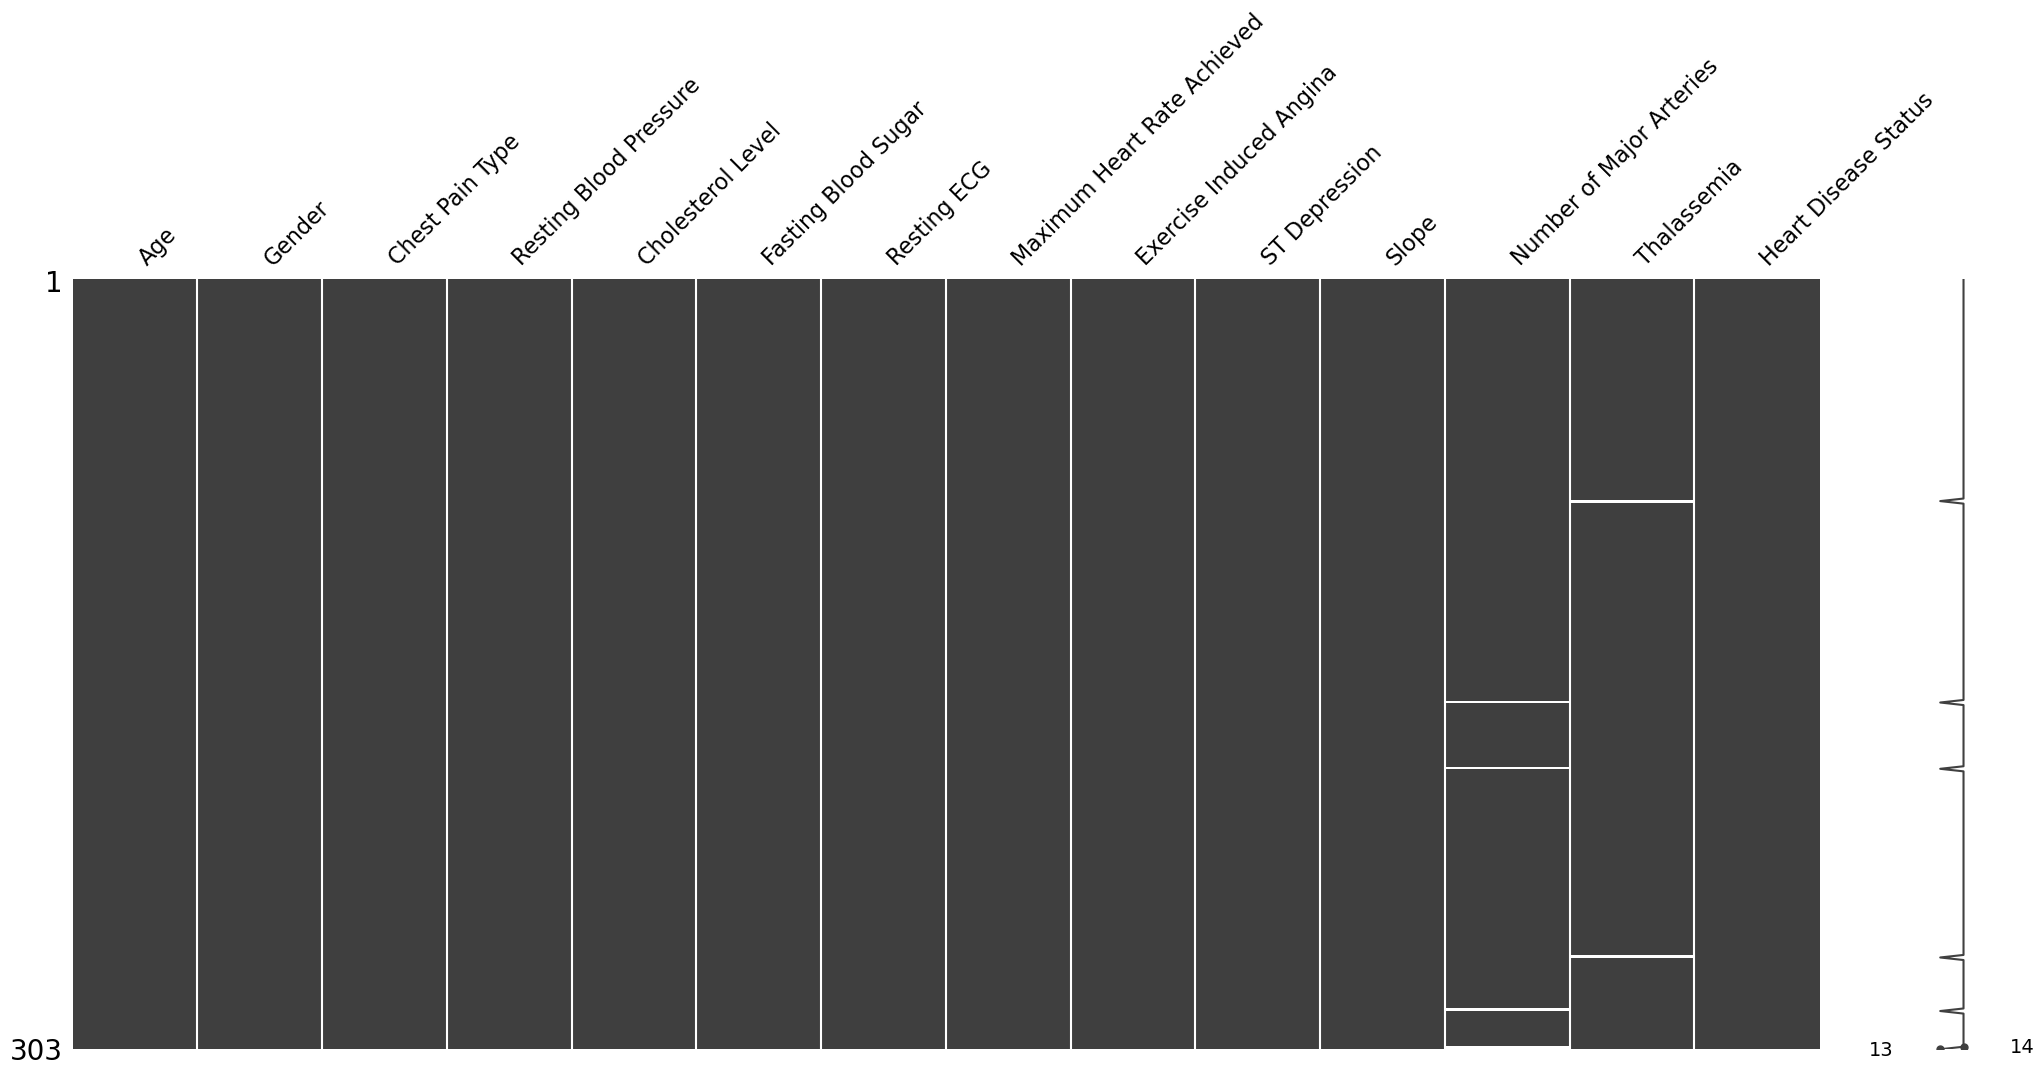

In [12]:
msno.matrix(df)


<Axes: >

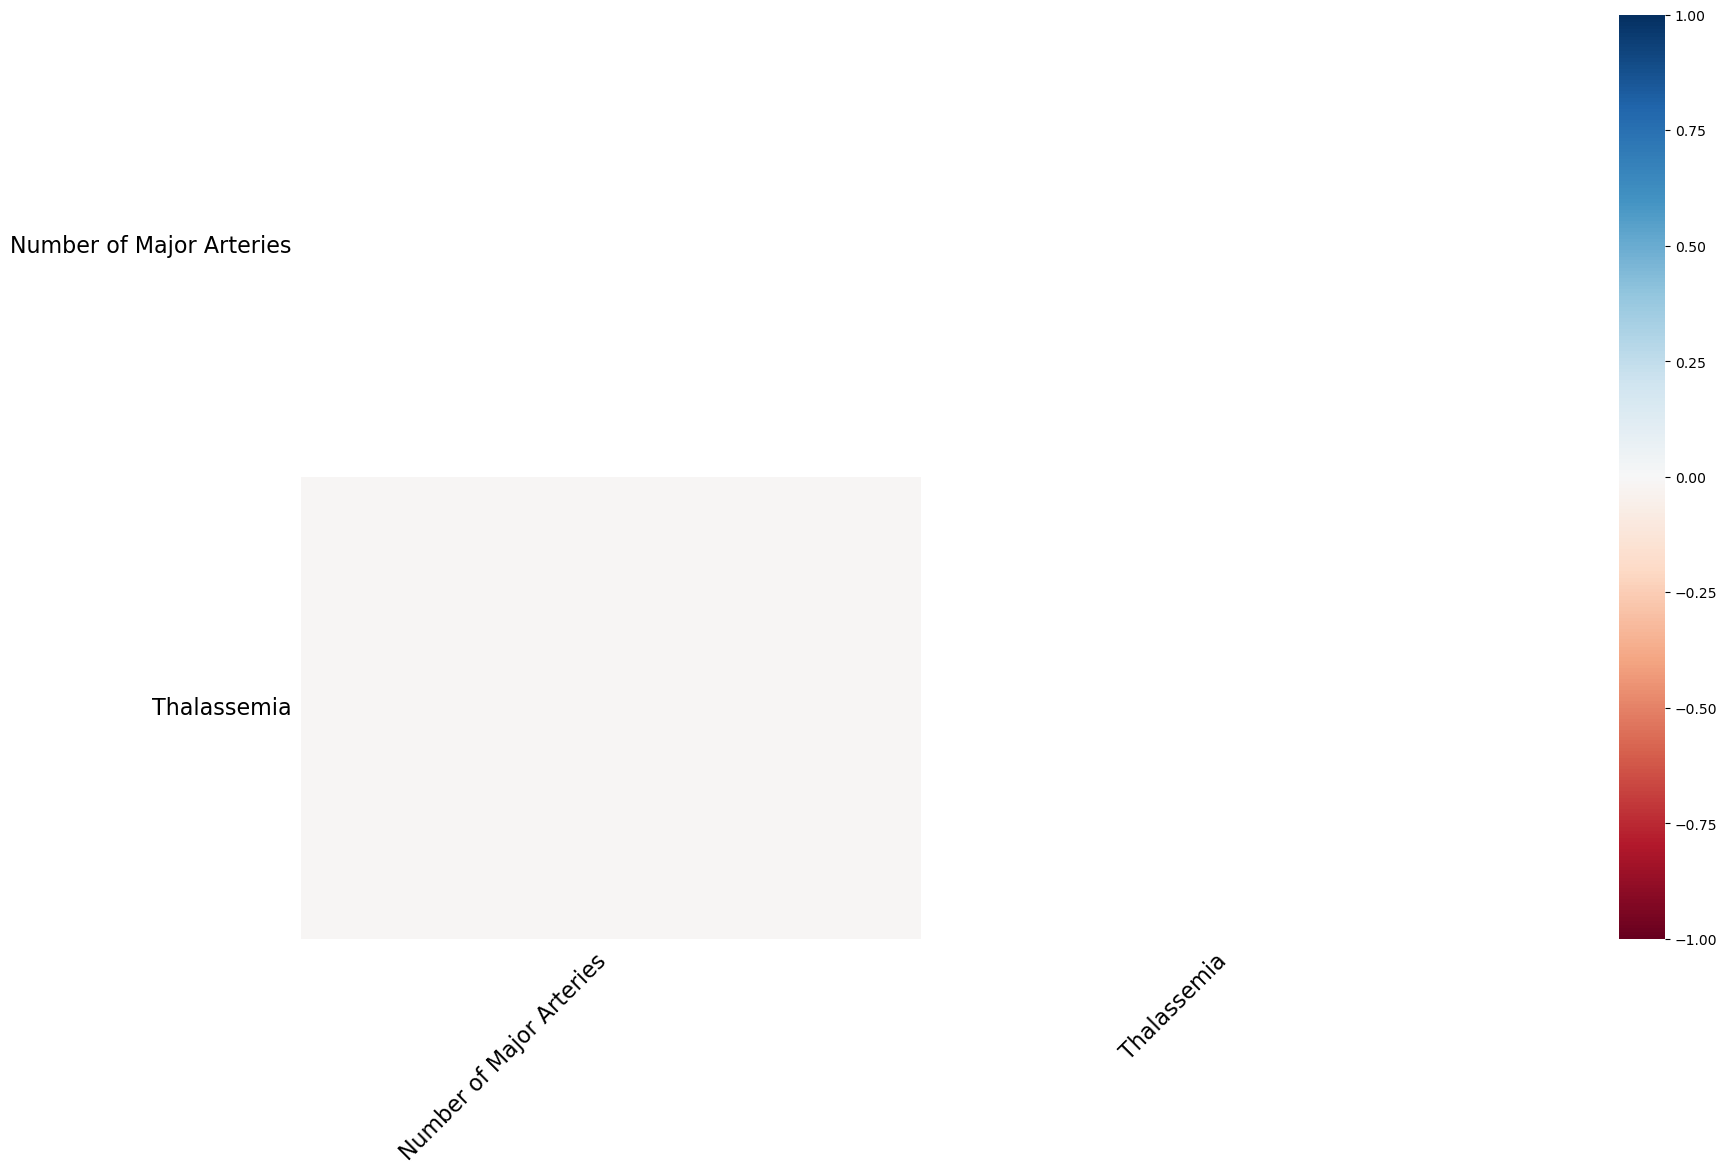

In [13]:
msno.heatmap(df)

---
## Imputing Missing Values: Mode for Categorical Features
---

In [14]:
# Replace the categorical columns with the mode
null_columns = ["Number of Major Arteries", "Thalassemia"]
for col in null_columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        
# Checking for missing values after compensation
print(df.isna().sum())


Age                            0
Gender                         0
Chest Pain Type                0
Resting Blood Pressure         0
Cholesterol Level              0
Fasting Blood Sugar            0
Resting ECG                    0
Maximum Heart Rate Achieved    0
Exercise Induced Angina        0
ST Depression                  0
Slope                          0
Number of Major Arteries       0
Thalassemia                    0
Heart Disease Status           0
dtype: int64


---
## Statistical Summary of Numerical Features
---

In [15]:
df[numeric_cols].describe()

,Age,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,ST Depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


---
## Correlation Analysis
---

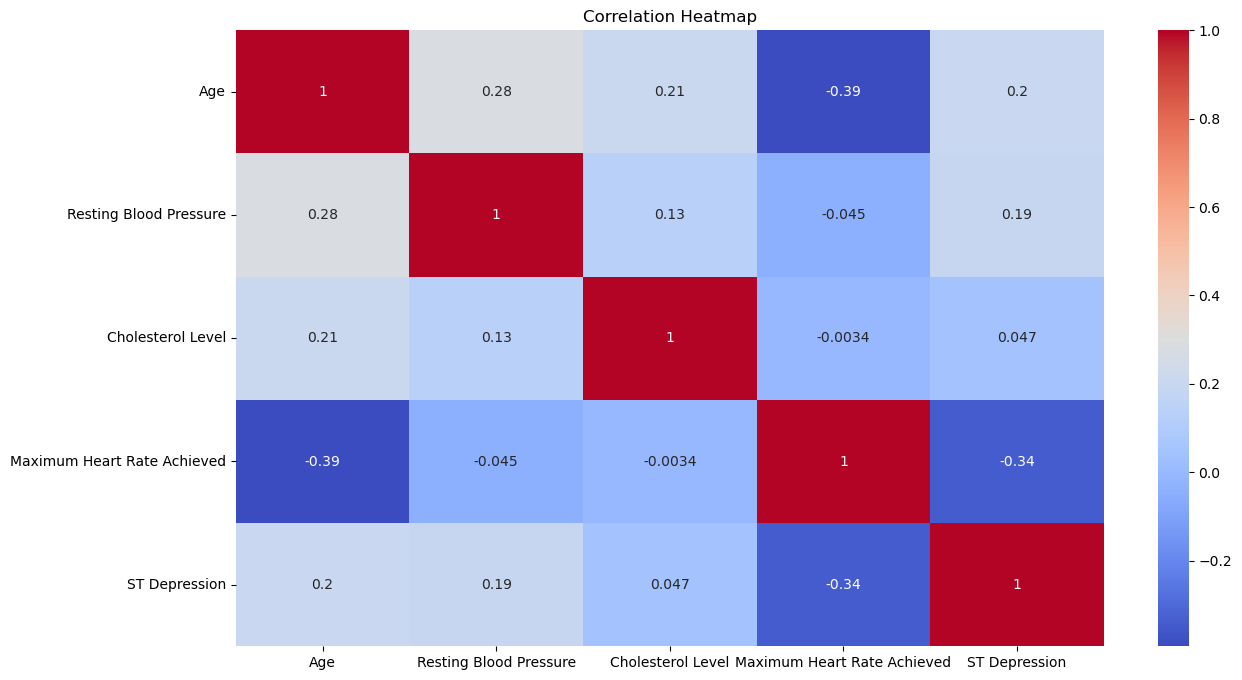

In [16]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

---
## Distribution of Categorical Features
---

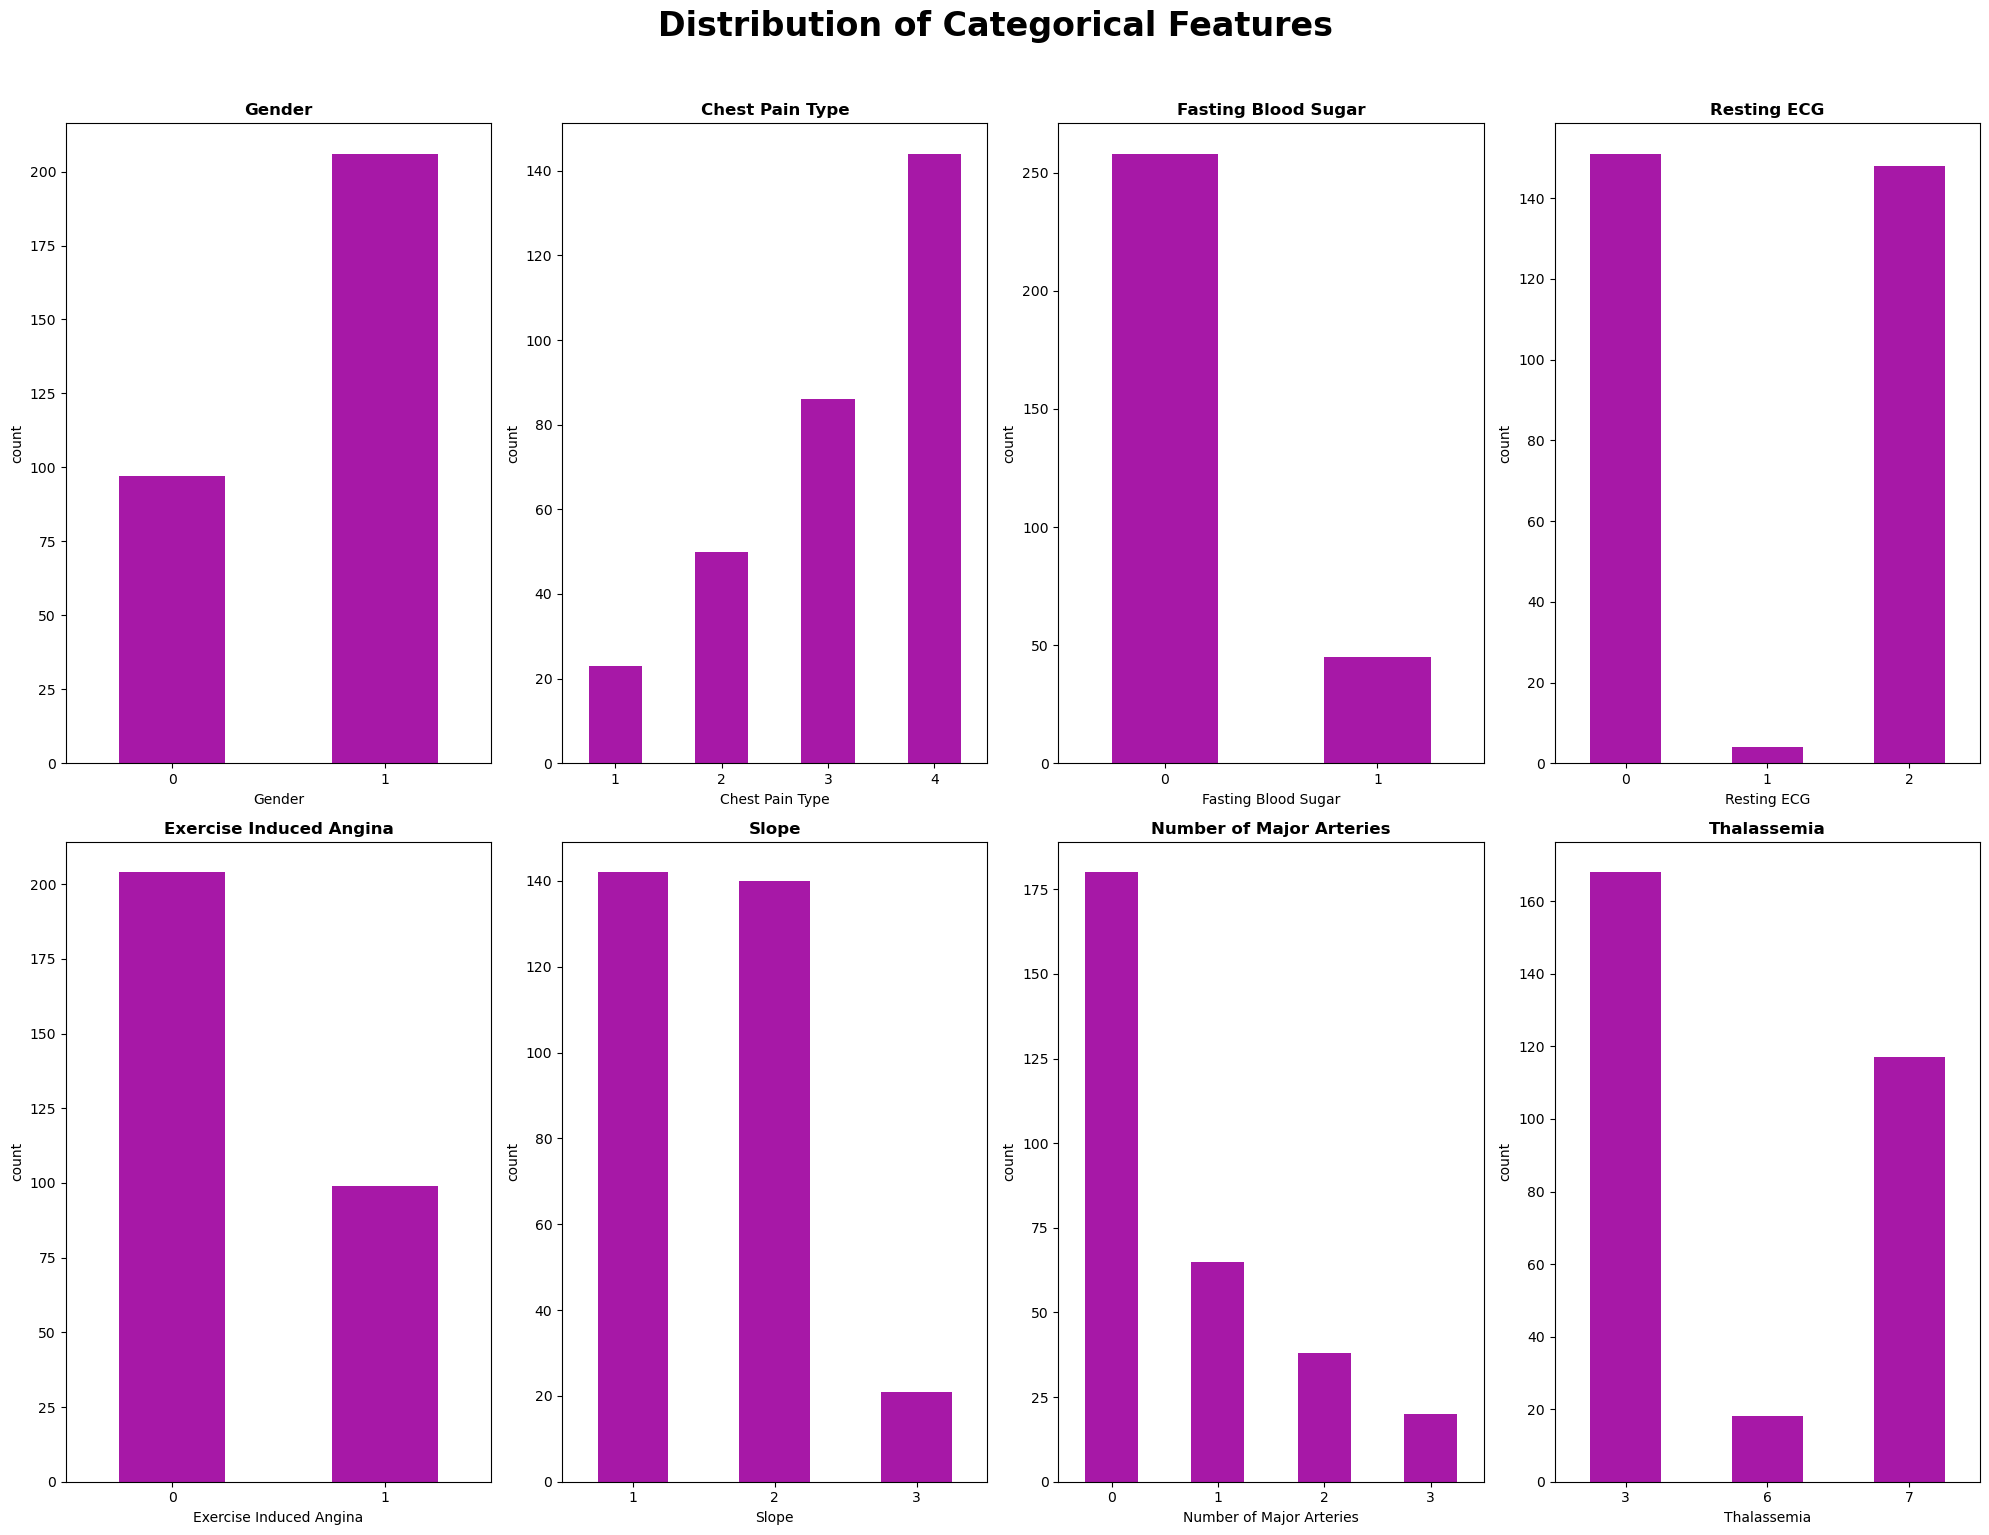

In [17]:
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes to make it iterable
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], width=0.5, color="m")
    axes[i].set_title(f'{col}', weight='bold')
    # axes[i].grid(True)

plt.suptitle("Distribution of Categorical Features", fontsize=24, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Distribution of Numerical Features
---

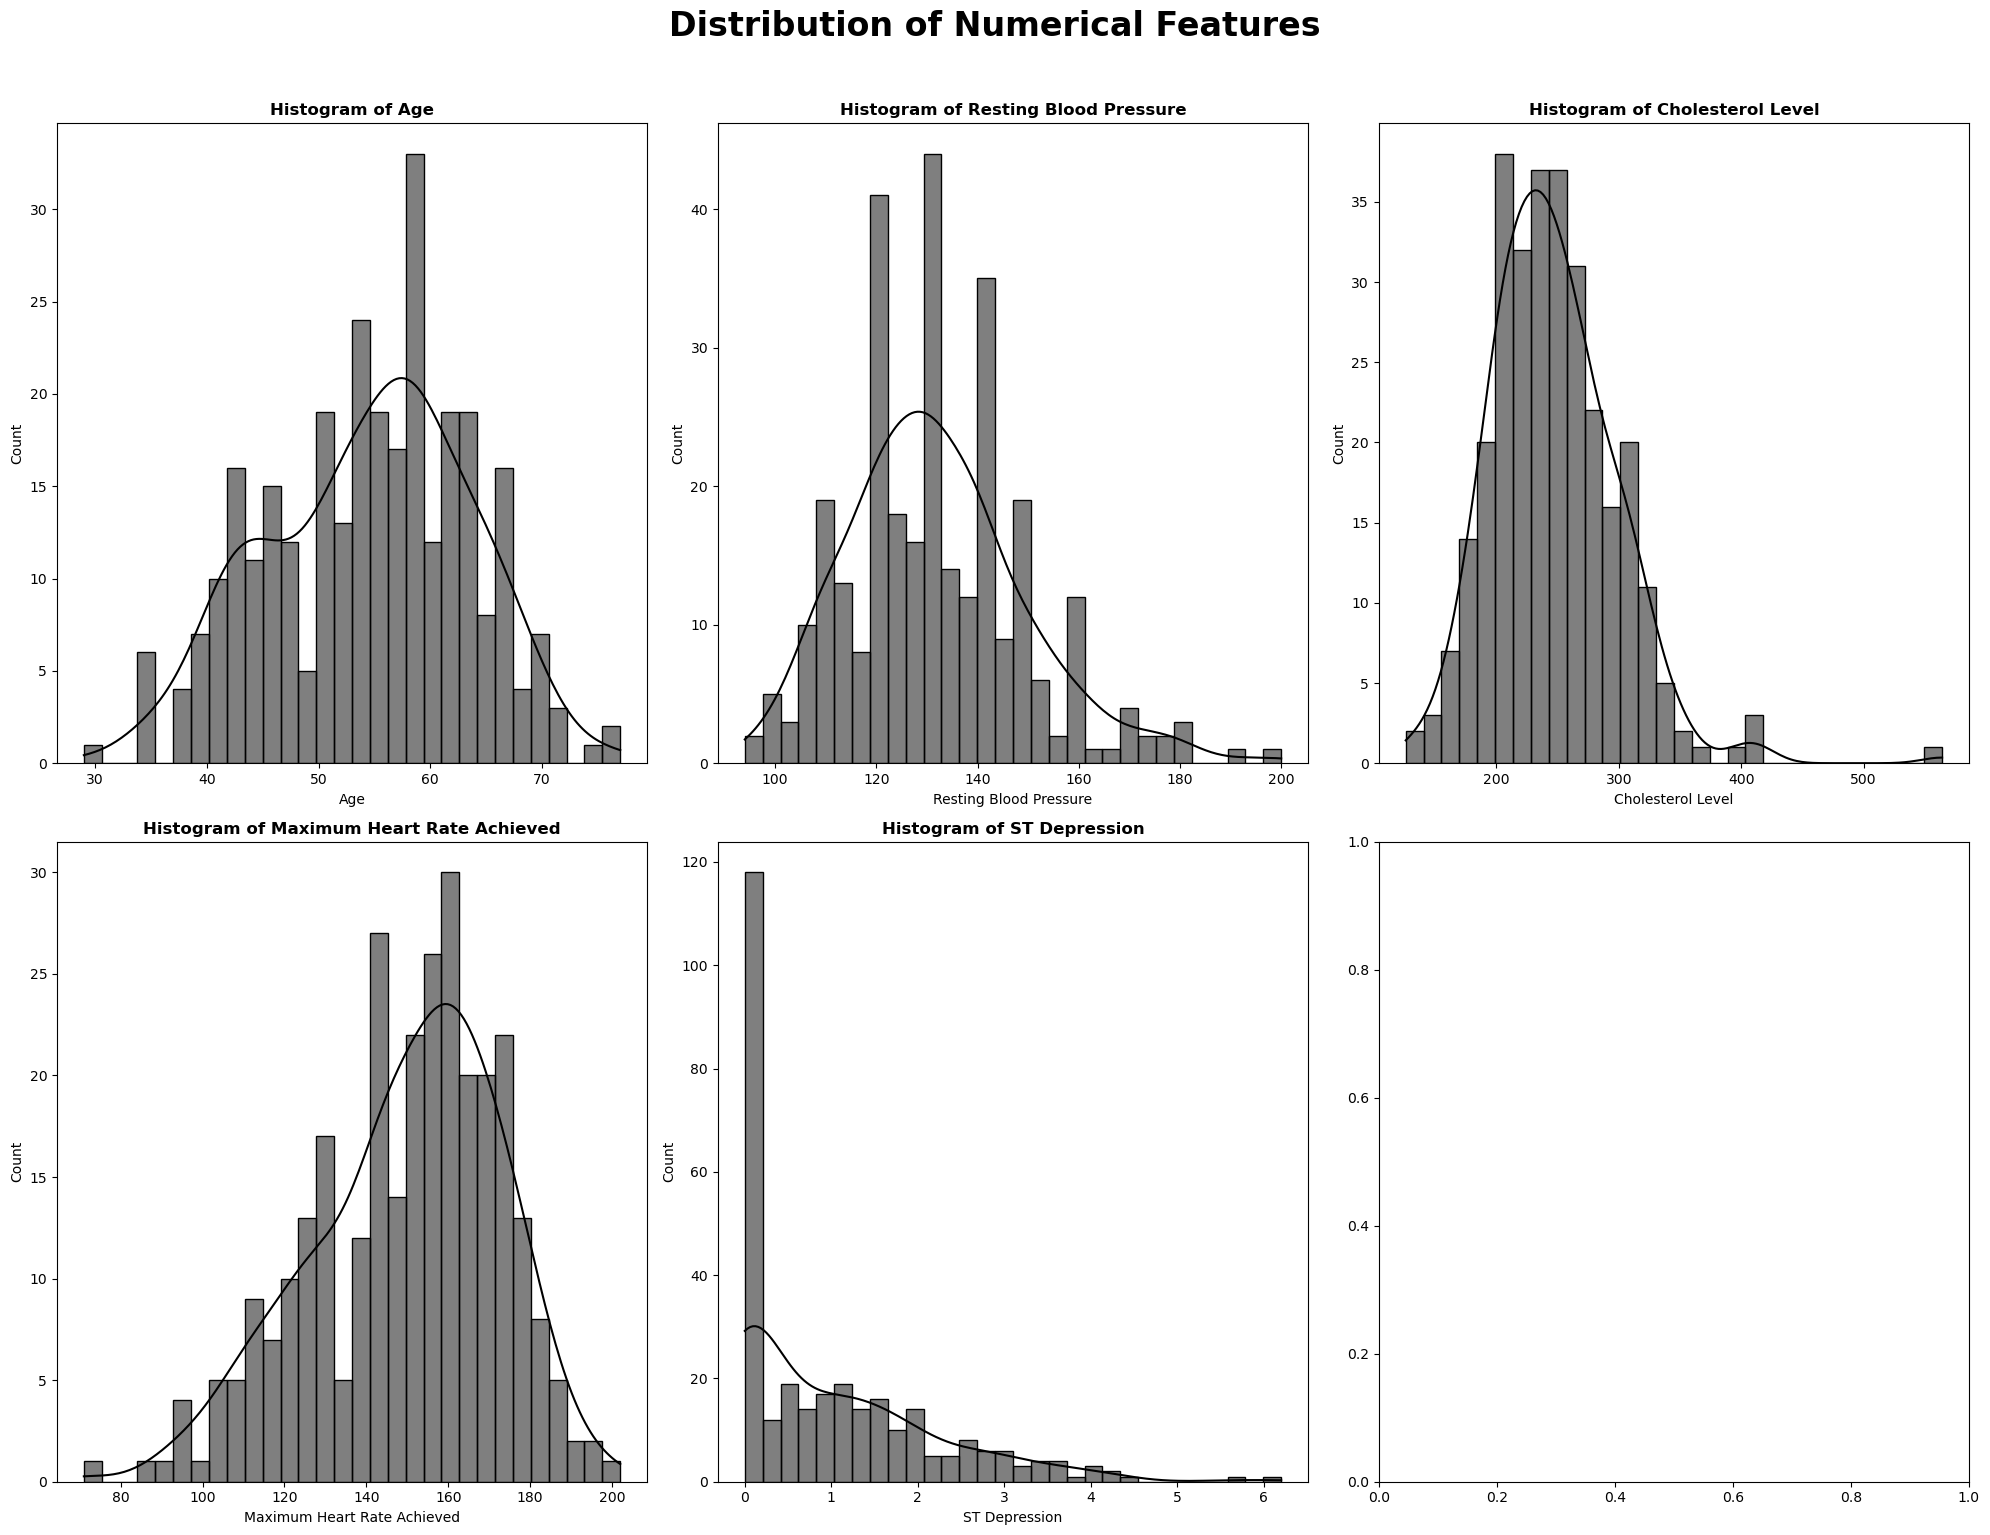

In [18]:
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes to make it iterable
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(x=df[col], ax=axes[i], color="k", kde=True, bins=30)
    axes[i].set_title(f'Histogram of {col}', weight='bold')
    # axes[i].grid(True)

plt.suptitle("Distribution of Numerical Features", fontsize=24, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Boxplots of Numerical Features
---

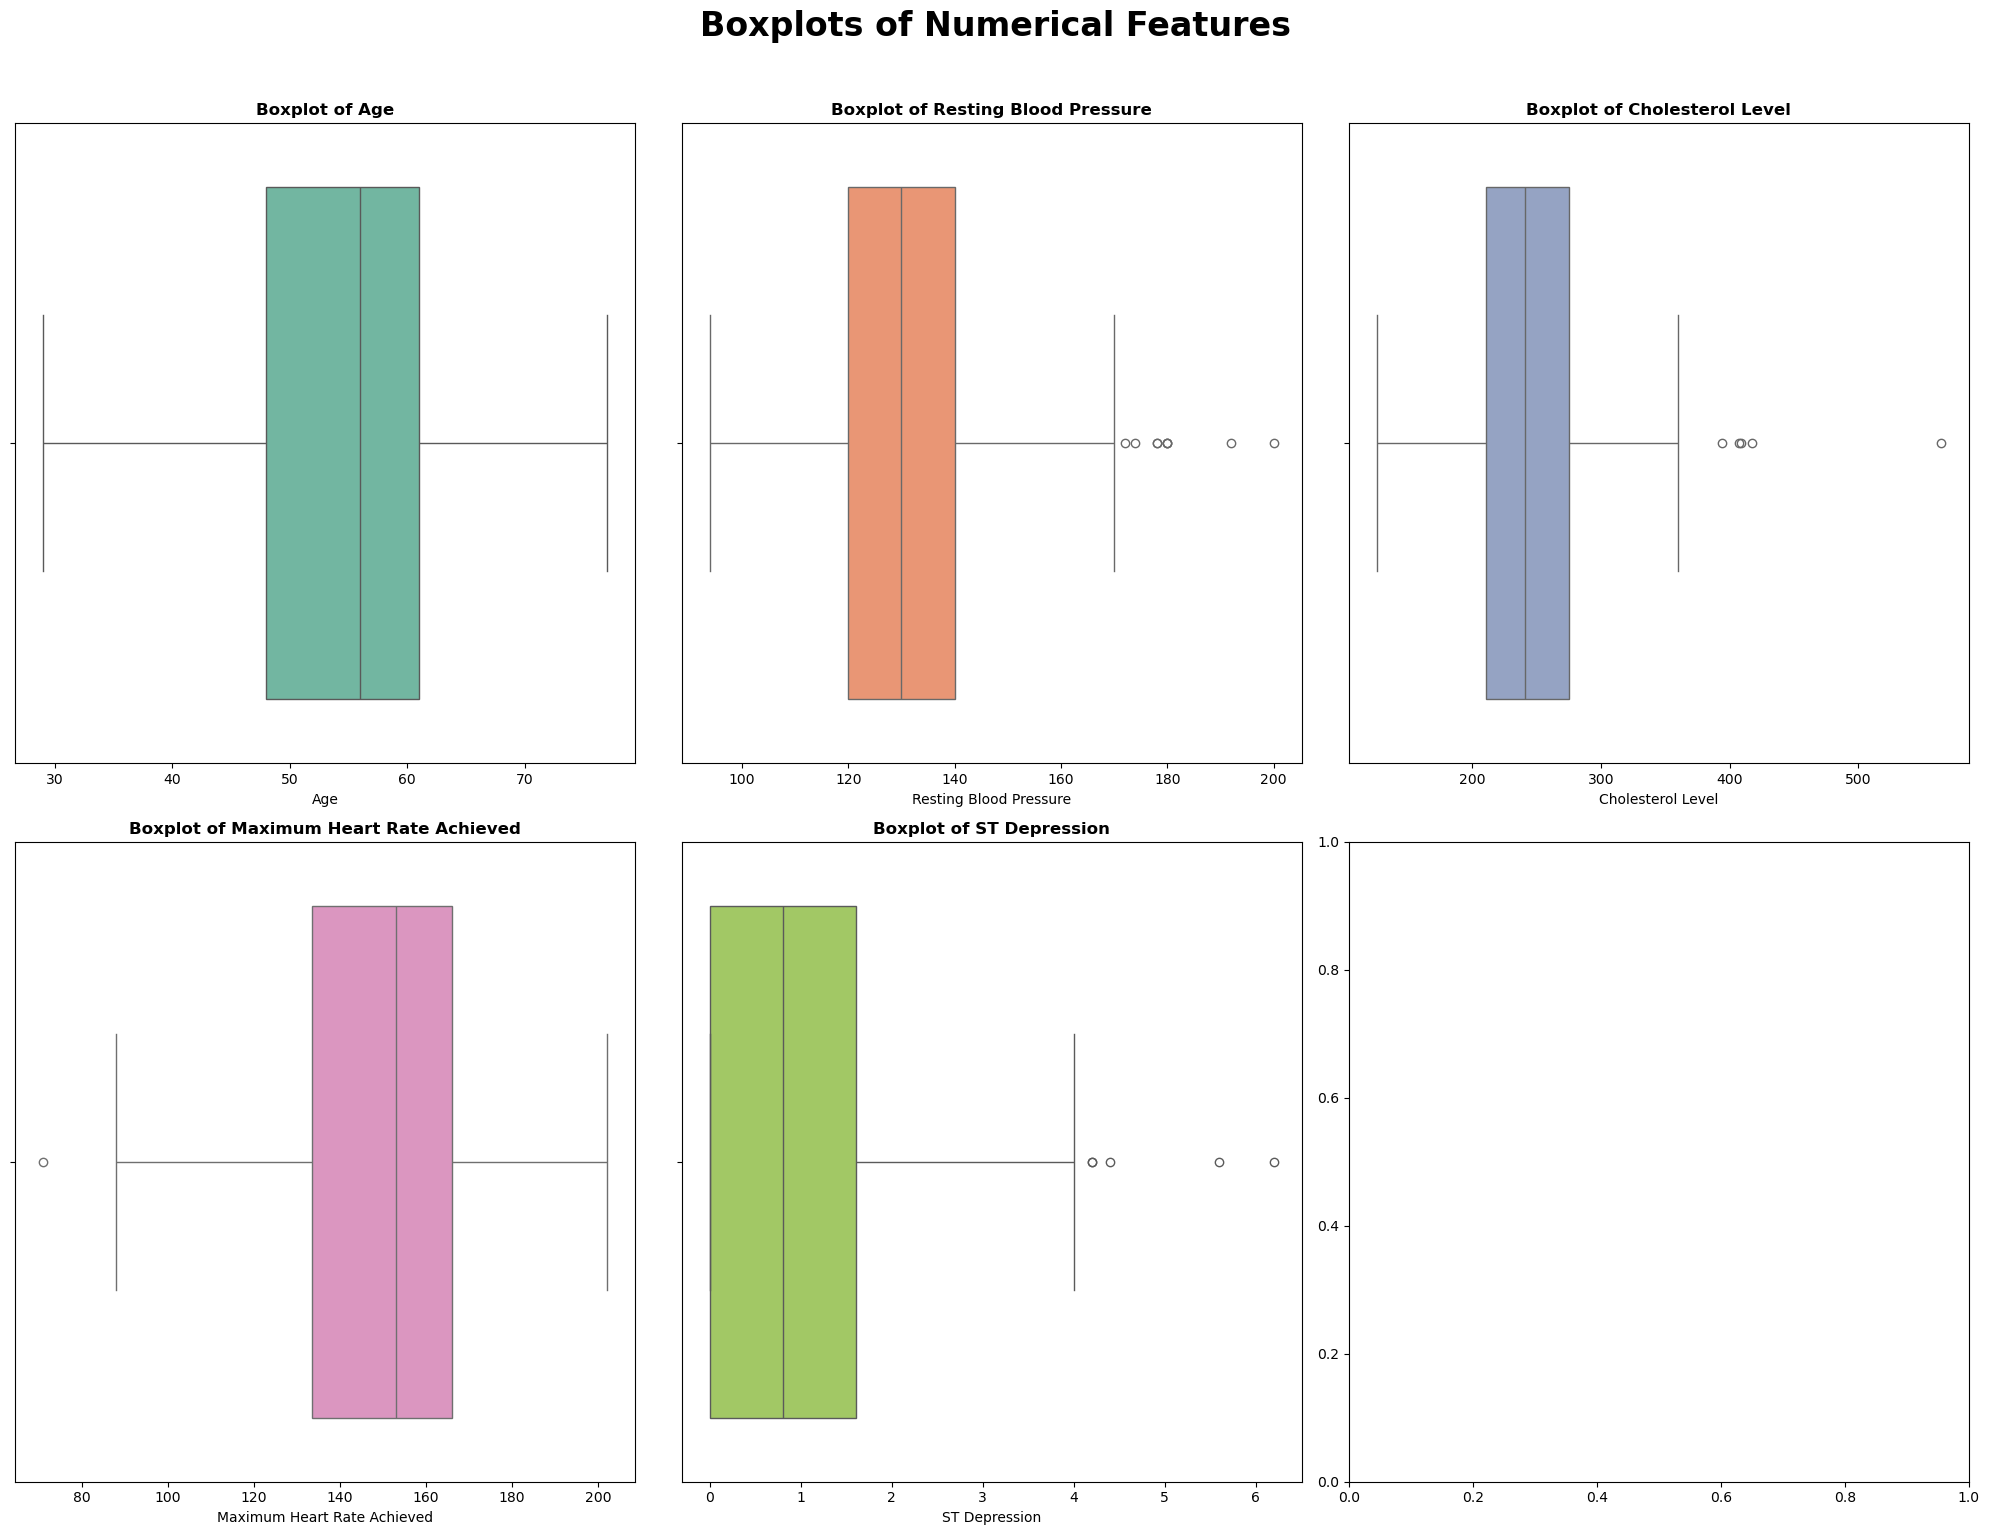

In [19]:
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes to make it iterable
axes = axes.flatten()
colors = sns.color_palette("Set2", len(numeric_cols)) 

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Boxplot of {col}', weight='bold')
    # axes[i].grid(True)

plt.suptitle("Boxplots of Numerical Features", fontsize=24, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Categorical Features vs Heart Disease Status
---

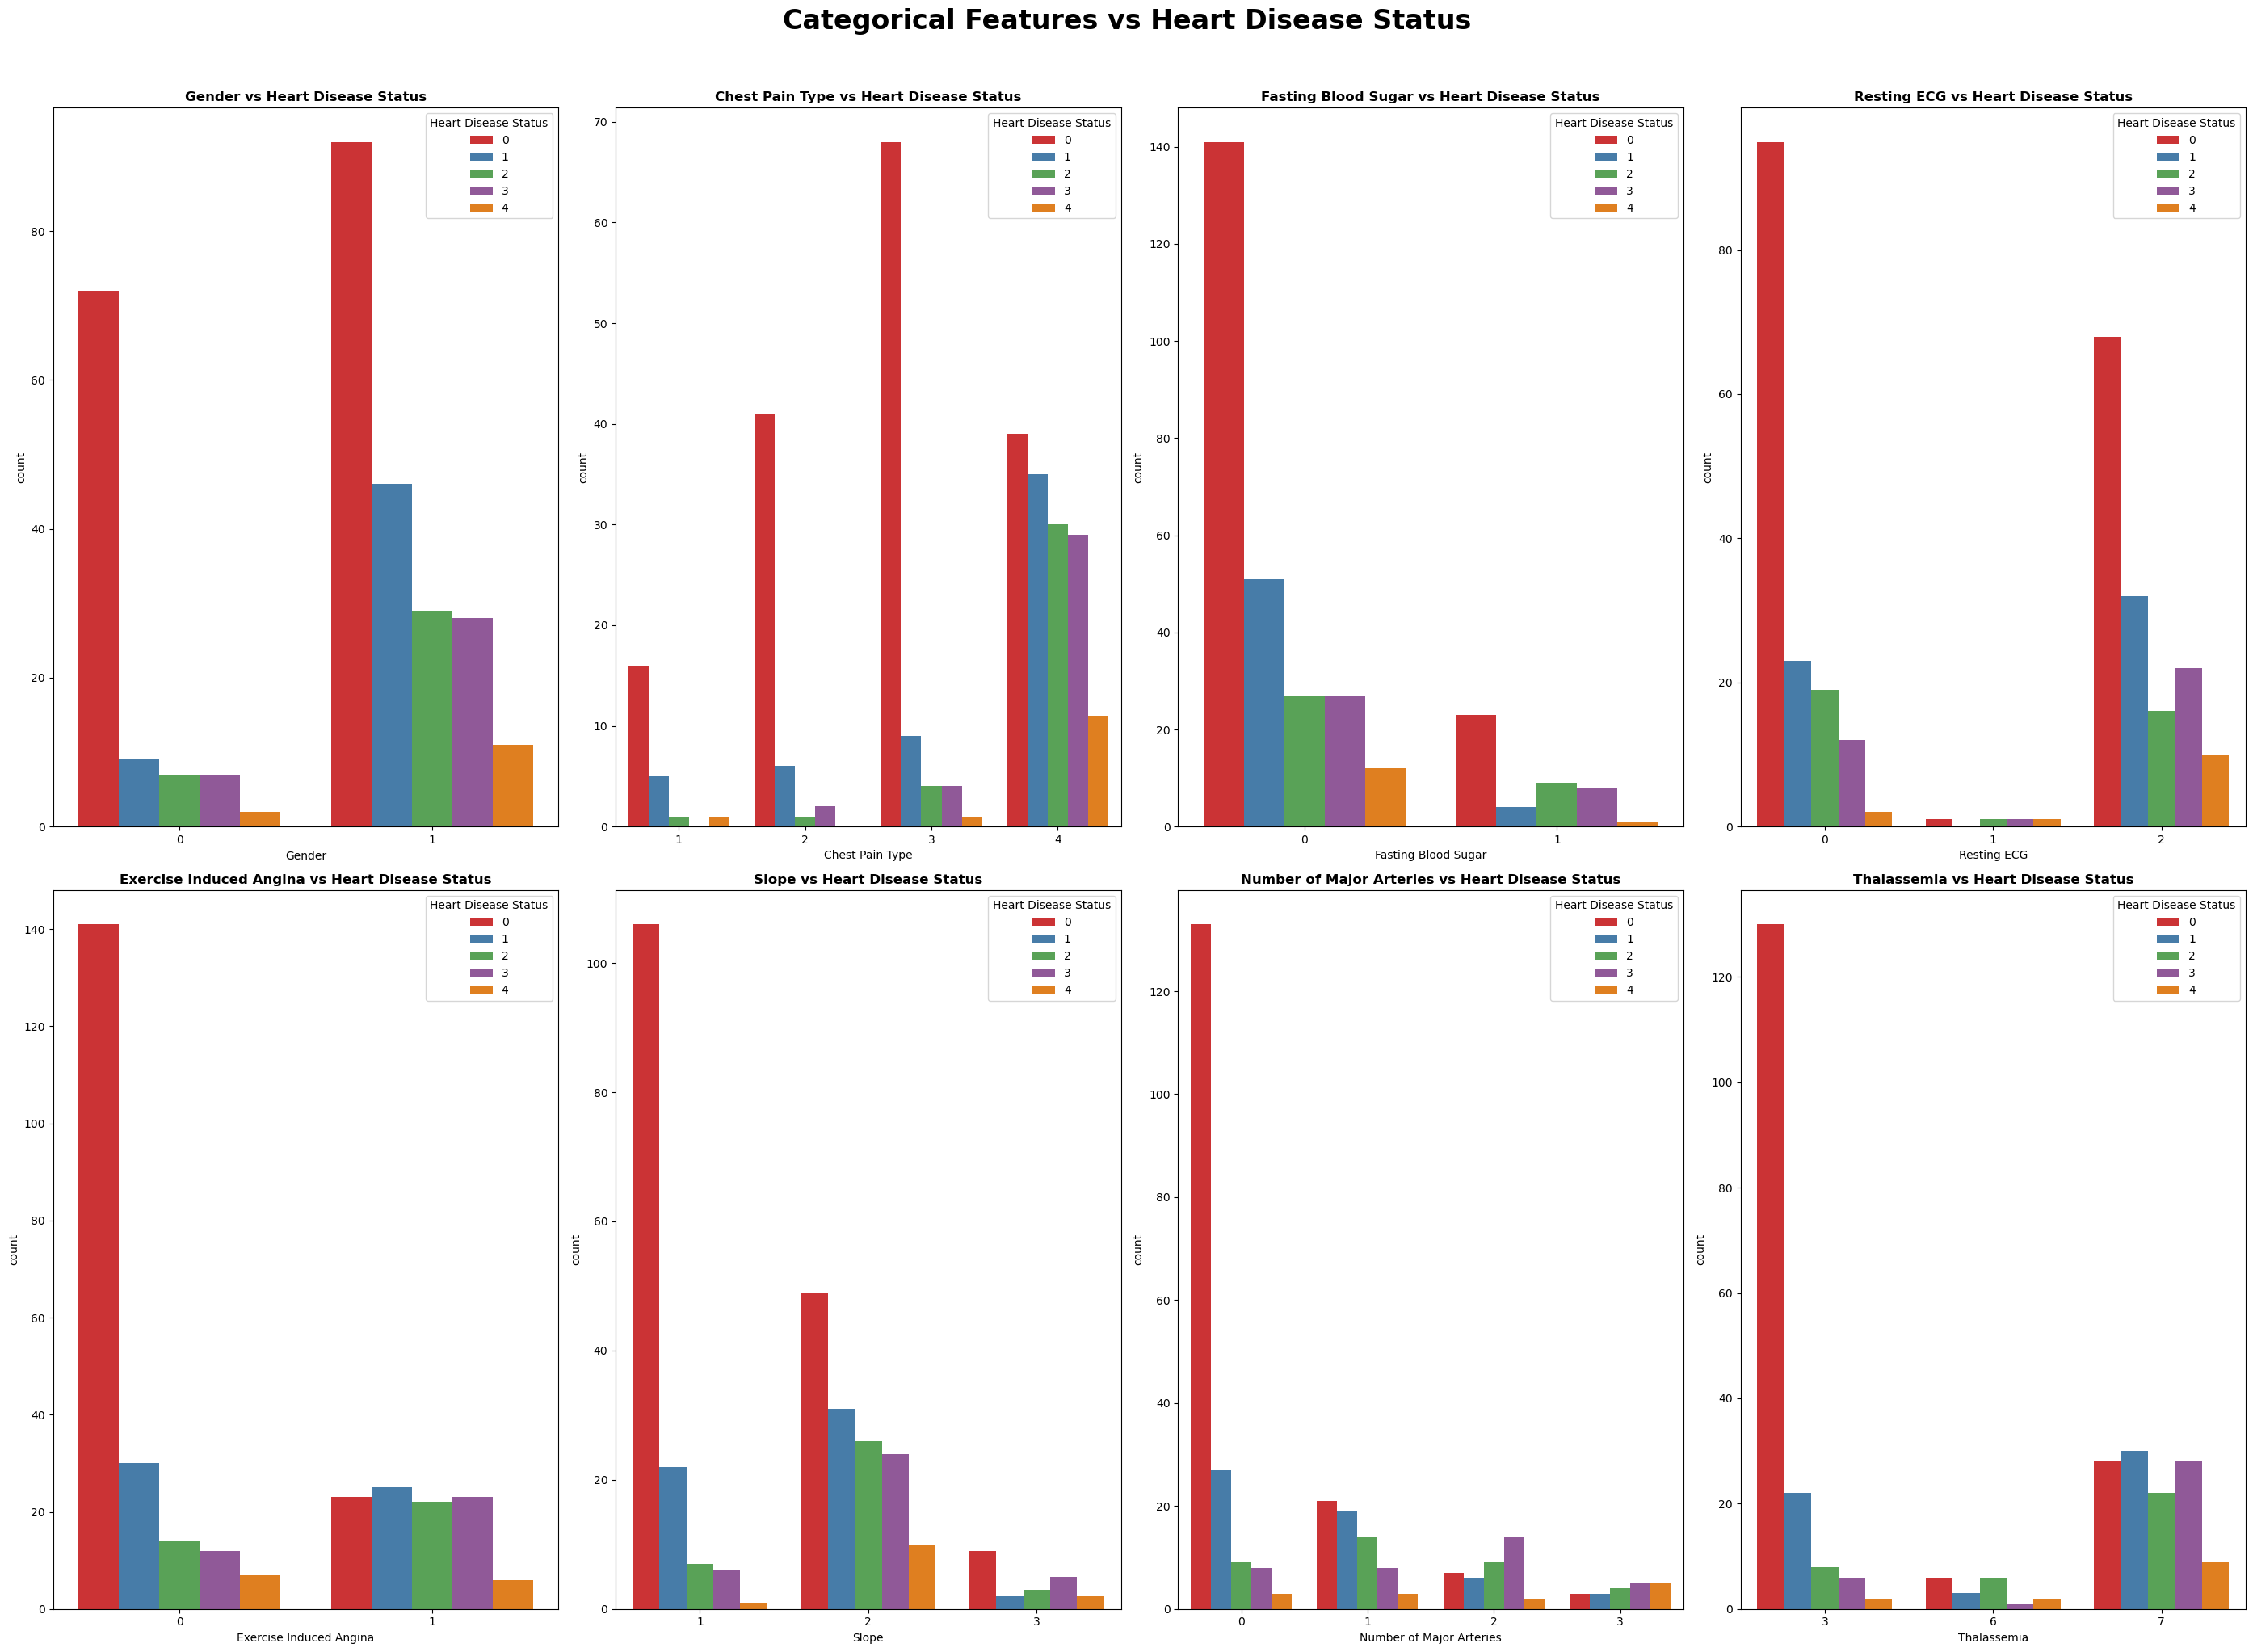

In [20]:
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(28, 20))

# Flatten axes to make it iterable
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], hue=df["Heart Disease Status"], ax=axes[i], palette='Set1')
    axes[i].set_title(f'{col} vs Heart Disease Status', weight='bold')
    # axes[i].grid(True)
    
plt.suptitle("Categorical Features vs Heart Disease Status", fontsize=24, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Numerical Features by Heart Disease Status (Boxplots)
---

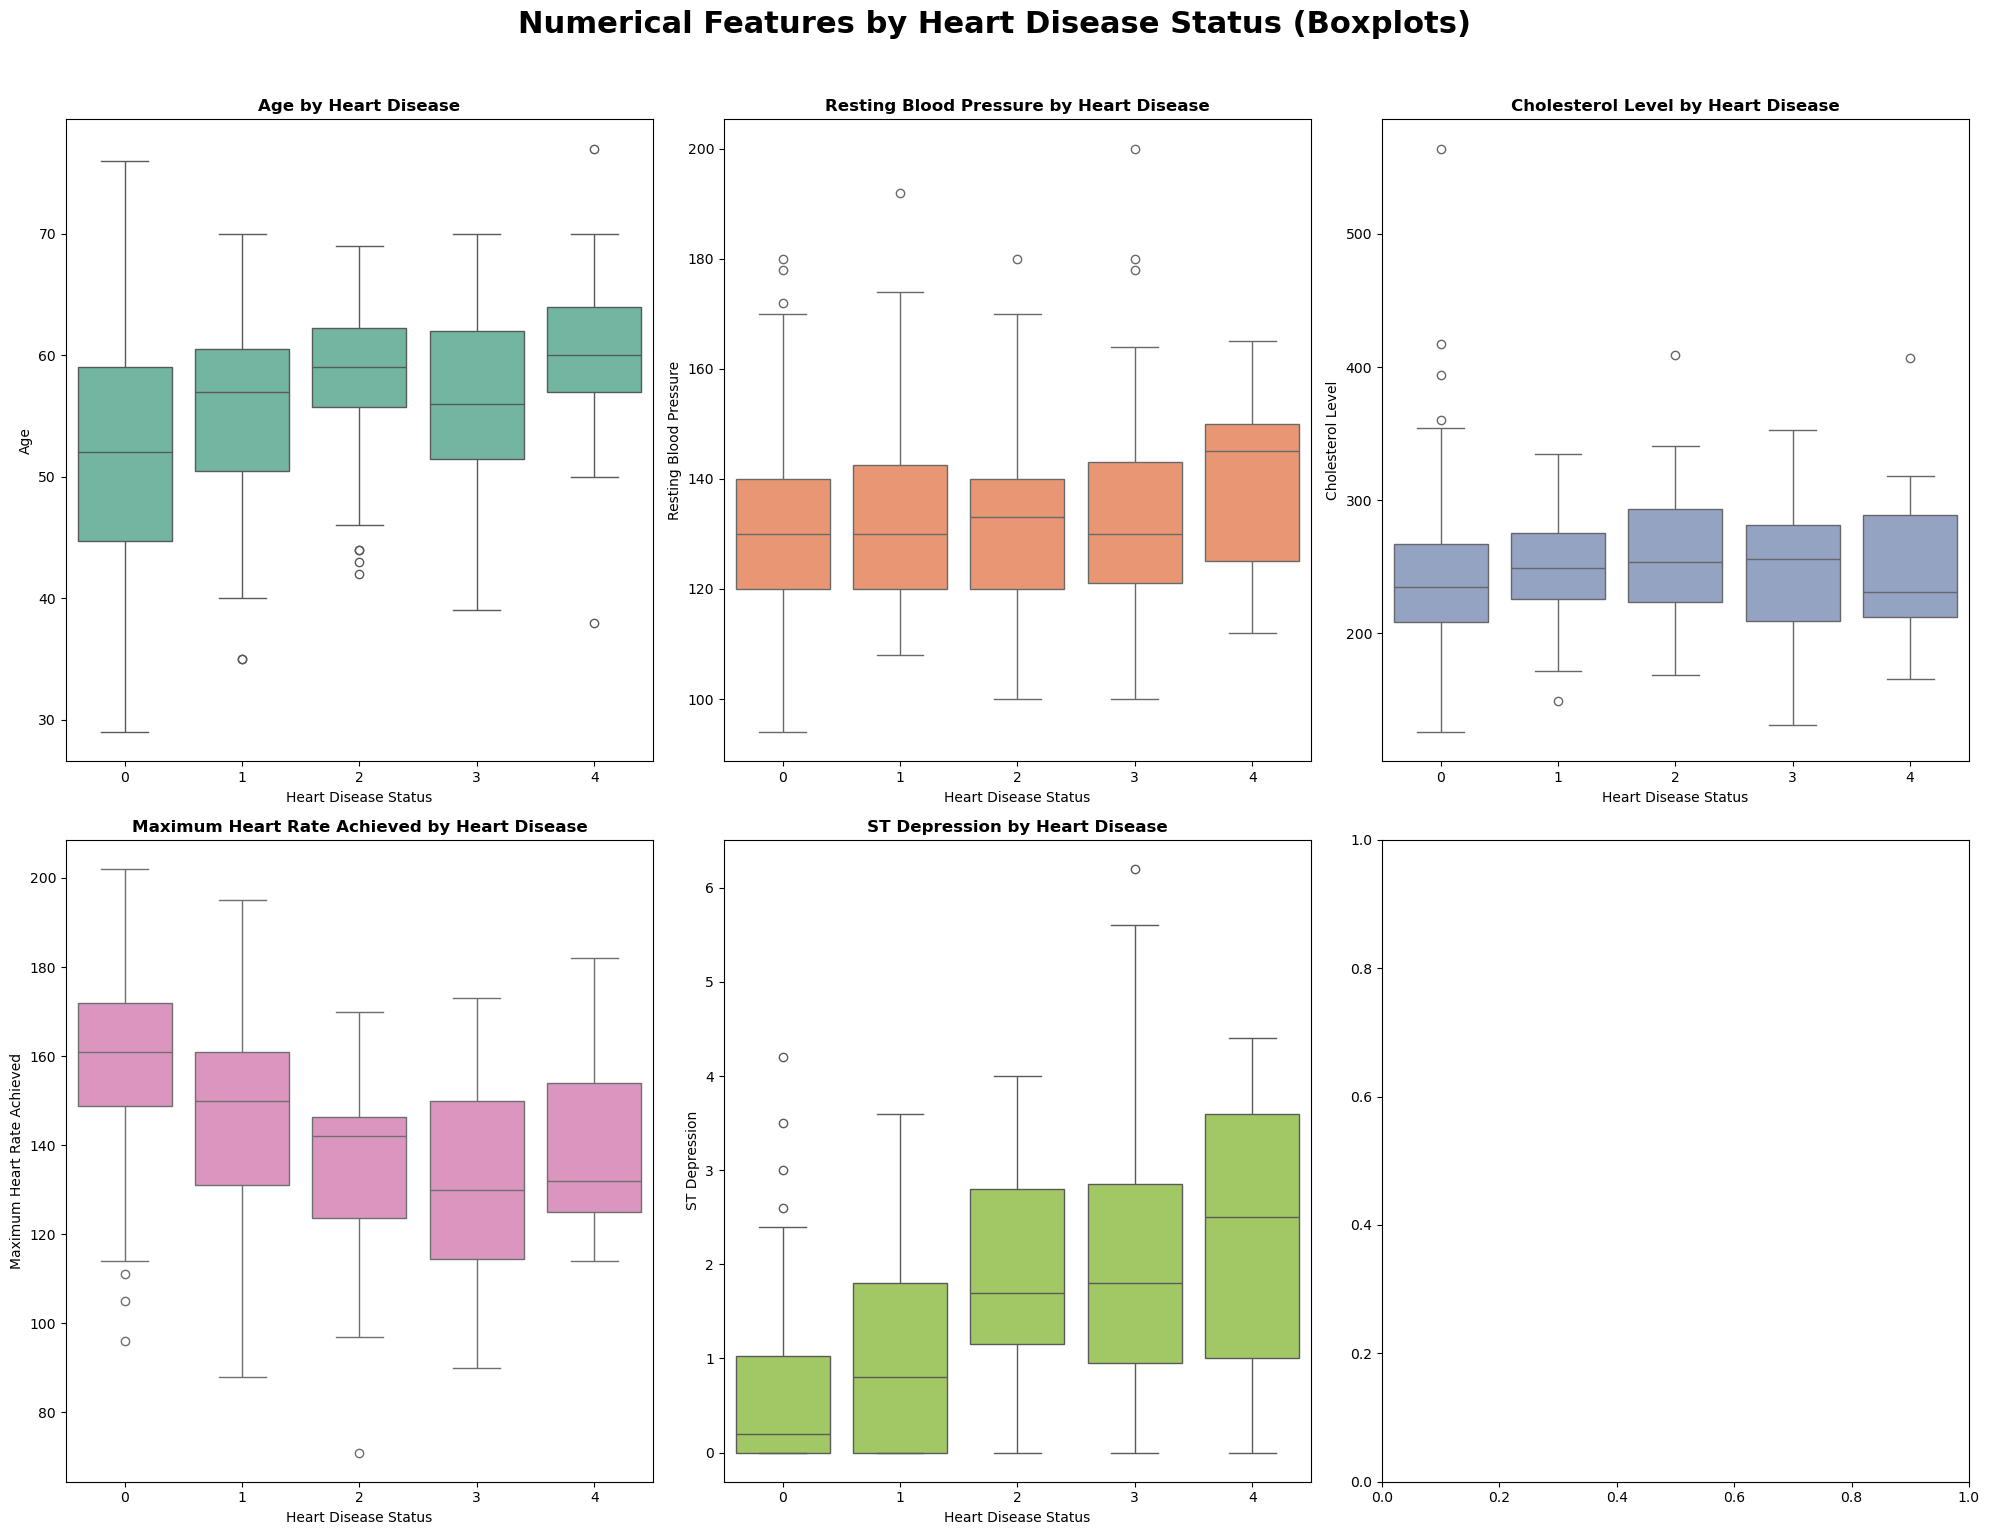

In [21]:
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes to make it iterable
axes = axes.flatten()
colors = sns.color_palette("Set2", len(numeric_cols)) 

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df["Heart Disease Status"], ax=axes[i], y=df[col], color=colors[i])
    axes[i].set_title(f'{col} by Heart Disease', weight='bold')
    # axes[i].grid(True)

plt.suptitle("Numerical Features by Heart Disease Status (Boxplots)", fontsize=22, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Converting Target Column to Binary Categorical Format
---

In [22]:
df["Heart Disease Status"] = df["Heart Disease Status"].astype(int)
df["Heart Disease Status"] = np.where(df["Heart Disease Status"] > 0, 1, 0)
df["Heart Disease Status"] = df["Heart Disease Status"].astype('category')
df.head(10)

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
5,56.0,1,2,120.0,236.0,0,0,178.0,0,0.8,1,0,3,0
6,62.0,0,4,140.0,268.0,0,2,160.0,0,3.6,3,2,3,1
7,57.0,0,4,120.0,354.0,0,0,163.0,1,0.6,1,0,3,0
8,63.0,1,4,130.0,254.0,0,2,147.0,0,1.4,2,1,7,1
9,53.0,1,4,140.0,203.0,1,2,155.0,1,3.1,3,0,7,1


In [23]:
pivot_1 = df.groupby(["Age", "Heart Disease Status"], observed=False).size().unstack(fill_value=0)
pivot_1.columns = ["Not Diseased", "Diseased"]
pivot_1 = pivot_1.reset_index()
pivot_1["Total"] = pivot_1["Not Diseased"] + pivot_1["Diseased"]
pivot_1["Disease_Rate"] = pivot_1["Diseased"] / pivot_1["Total"]
pivot_1

,Age,Not Diseased,Diseased,Total,Disease_Rate
0,29.0,1,0,1,0.000000
1,34.0,2,0,2,0.000000
2,35.0,2,2,4,0.500000
3,37.0,2,0,2,0.000000
4,38.0,1,1,2,0.500000
5,39.0,3,1,4,0.250000
6,40.0,1,2,3,0.666667
7,41.0,9,1,10,0.100000
8,42.0,7,1,8,0.125000
9,43.0,5,3,8,0.375000


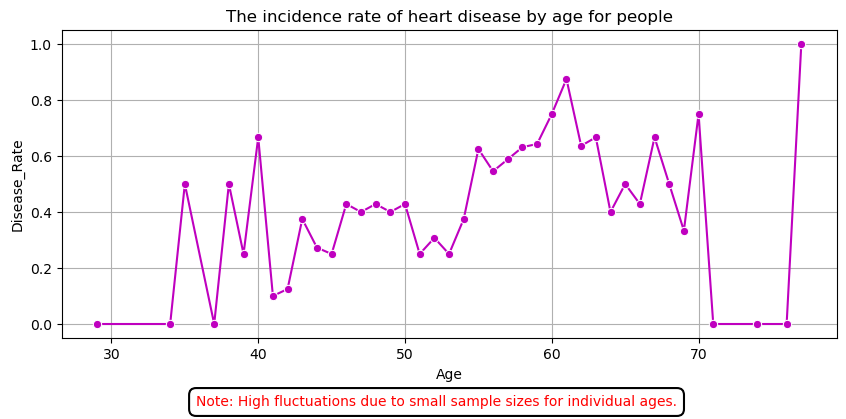

In [24]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=pivot_1["Age"], y=pivot_1["Disease_Rate"], marker="o", color="m")
plt.title("The incidence rate of heart disease by age for people")
plt.xlabel("Age")
plt.ylabel("Disease_Rate")
plt.grid(True)

plt.figtext(0.5, -0.06,
            "Note: High fluctuations due to small sample sizes for individual ages.",
            ha="center", fontsize=10, color="red",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5", linewidth=1.5))

plt.show()

#### This type of analysis provides high accuracy because it analyzes the incidence rate by each age group separately, 
#### but it may experience fluctuations if the number of data points is low for certain ages.

In [25]:
df["age_bin"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80])
pivot_2 = df.groupby(["age_bin", "Heart Disease Status"], observed=False).size().unstack(fill_value=0)
df.drop('age_bin', axis=1, inplace=True)
pivot_2

Heart Disease Status,0,1
age_bin,,
"(20, 30]",1,0
"(30, 40]",11,6
"(40, 50]",53,23
"(50, 60]",64,66
"(60, 70]",30,43
"(70, 80]",5,1


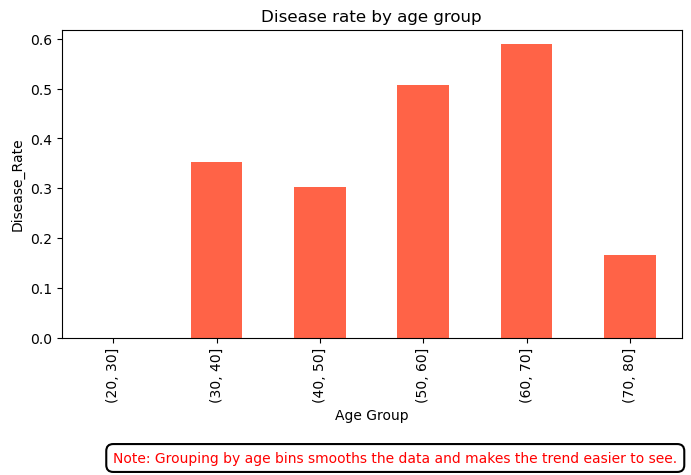

In [26]:
pivot_2["Disease_Rate"] = pivot_2[1] / (pivot_2[0] + pivot_2[1])
pivot_2["Disease_Rate"].plot(kind="bar", color="tomato", figsize=(8, 4))
plt.title("Disease rate by age group")
plt.xlabel("Age Group")
plt.ylabel("Disease_Rate")

plt.text(0, -0.25,
         "Note: Grouping by age bins smooths the data and makes the trend easier to see.",
         fontsize=10, color="red", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5", linewidth=1.5))
plt.show()

###  Note:
####        This type of analysis groups ages to reduce noise, 
####        and it clarifies the general trend in a clearer and easier way to interpret, but it is less accurate than analysis by each age.

---
## Outliers Detection Report
---

In [27]:
outliers_summary = []
for col in numeric_cols:
    idx_outliers = detect_outliers(df, 0, [col])
    n_outliers = len(idx_outliers)
    perc_outliers = (n_outliers / len(df)) * 100
    
    outliers_summary.append({
        "Column": col,
        "Outliers Count": n_outliers,
        "Outliers %": round(perc_outliers, 2),
        "Indices": idx_outliers
    })

outliers_df = pd.DataFrame(outliers_summary)

outliers_df

,Column,Outliers Count,Outliers %,Indices
0,Age,0,0.00,[]
1,Resting Blood Pressure,9,2.97,"[14, 83, 126, 172, 183, 188, 201, 213, 231]"
2,Cholesterol Level,5,1.65,"[48, 121, 152, 173, 181]"
3,Maximum Heart Rate Achieved,1,0.33,[245]
4,ST Depression,5,1.65,"[91, 123, 183, 191, 285]"


In [28]:
# The num columns that contain outliers
num_cols_with_outliers = ["Resting Blood Pressure", "Cholesterol Level", 
                          "Maximum Heart Rate Achieved", "ST Depression"]

# Replacing outlier values with the median for each column
for col in num_cols_with_outliers:
    median_val = df[col].median()
    # Here we assume that the outliers have been predefined or can be identified using IQR.
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Replacing out-of-bound values with the median
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_val, df[col])

# The confirmation
df[num_cols_with_outliers].describe()


,Resting Blood Pressure,Cholesterol Level,Maximum Heart Rate Achieved,ST Depression
count,303.000000,303.000000,303.000000,303.000000
mean,130.158416,243.438944,149.877888,0.971617
std,15.208310,44.689533,22.422529,1.041070
min,94.000000,126.000000,88.000000,0.000000
25%,120.000000,211.000000,135.000000,0.000000
50%,130.000000,241.000000,153.000000,0.800000
75%,140.000000,273.000000,166.000000,1.600000
max,170.000000,360.000000,202.000000,4.000000


---
## A shape that shows whether the data is balanced or unbalanced.
---

Class Distribution:
Heart Disease Status
0    164
1    139
Name: count, dtype: int64

Class Percentages:
Heart Disease Status
0    54.125413
1    45.874587
Name: proportion, dtype: float64


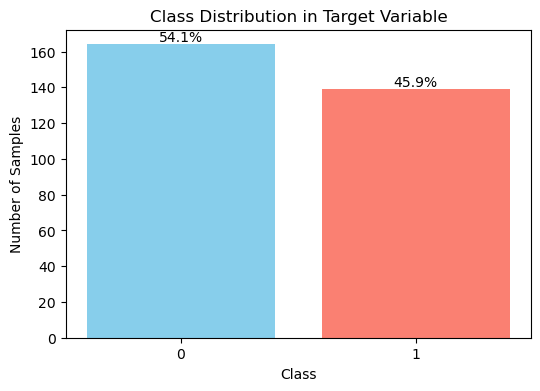


The dataset appears to be balanced.


In [29]:
class_counts = df['Heart Disease Status'].value_counts()
class_percentages = df['Heart Disease Status'].value_counts(normalize=True)*100

print("Class Distribution:")
print(class_counts)

print("\nClass Percentages:")
print(class_percentages)

plt.figure(figsize=(6,4))
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

for bar, percentage in zip(bars, class_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

majority_percentage = class_percentages.max()
if majority_percentage > 60:
    print("\nThe dataset is likely imbalanced.")
else:
    print("\nThe dataset appears to be balanced.")


---
## Save the final file(df) after editing it to continue working on it.
---

In [30]:
df.to_csv('../datasets/pre_final_data.csv', index=False)
